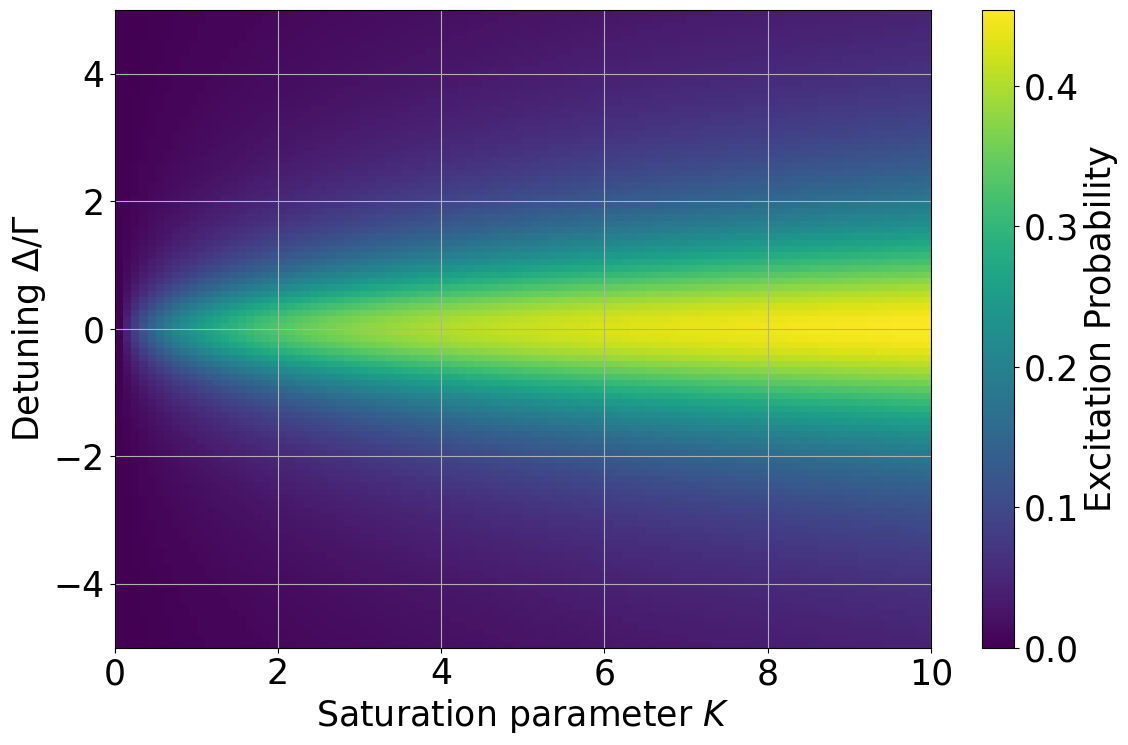

In [36]:
import numpy as np
import matplotlib.pyplot as plt


# Define a range of values for K1 and Δ/Γ (the ratio)
K1_range = np.linspace(0, 10, 100)
ratio_ΔΓ_range = np.linspace(-5, 5, 100)

# Create a grid of K1 and Δ/Γ values
K1_grid, ratio_ΔΓ_grid = np.meshgrid(K1_range, ratio_ΔΓ_range)

# Calculate the heatmap values using the equation
heatmap_values = K1_grid / (2 * (4 * (ratio_ΔΓ_grid**2) + K1_grid + 1))

# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
heatmap = plt.imshow(heatmap_values, extent=[K1_range[0], K1_range[-1], ratio_ΔΓ_range[0], ratio_ΔΓ_range[-1]],
                     origin='lower', cmap='viridis', aspect='auto')

# plt.axvspan(xmin=6.9, xmax=7.1, color='red', alpha=0.3)
colorbar=plt.colorbar(heatmap)
colorbar.set_label('Excitation Probability')
plt.xlabel(r"Saturation parameter $K$")
plt.ylabel(r"Detuning $\Delta / \Gamma$")
plt.grid(True)
plt.tight_layout()
plt.savefig('Excitation_map.png', dpi=300)
# plt.savefig('Excitation_map.eps', dpi=300)
plt.show()

# Define a dictionary to store the data
data = {
    'K1_range': K1_range.tolist(),
    'Delta_Gamma_ratio_range': ratio_ΔΓ_range.tolist(),
    'Excitation probability': heatmap_values.tolist(),
}

# # Save data in JSON format
# with open('map_of_excitation_analytical.json', 'w') as f:
#     json.dump(data, f, indent=1)


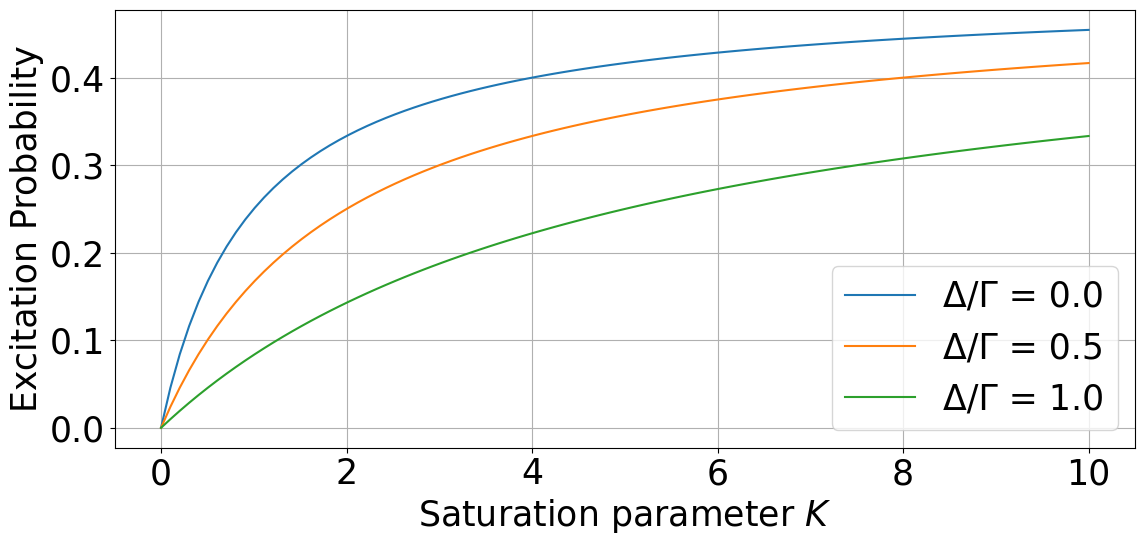

In [37]:
import numpy as np
import matplotlib.pyplot as plt


# Define a range of values for K1 and Δ/Γ (the ratio)
K1_range = np.linspace(0, 10, 100)

# Define a range of values for Δ/Γ
ratio_ΔΓ_range = np.linspace(0, 1, 3)  # For example, from -5 to 5 with a step size of 1

# Plot the excitation probability curves for different Δ/Γ values
plt.figure(figsize=(12, 6))

for ratio_ΔΓ_value in ratio_ΔΓ_range:
    excitation_probability_curve = K1_range / (2 * (4 * (ratio_ΔΓ_value**2) + K1_range + 1))
    plt.plot(K1_range, excitation_probability_curve, label=f'Δ/Γ = {ratio_ΔΓ_value}')

plt.xlabel(r"Saturation parameter $K$")
plt.ylabel('Excitation Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Saturation_parameter.png', dpi=300)
plt.show()

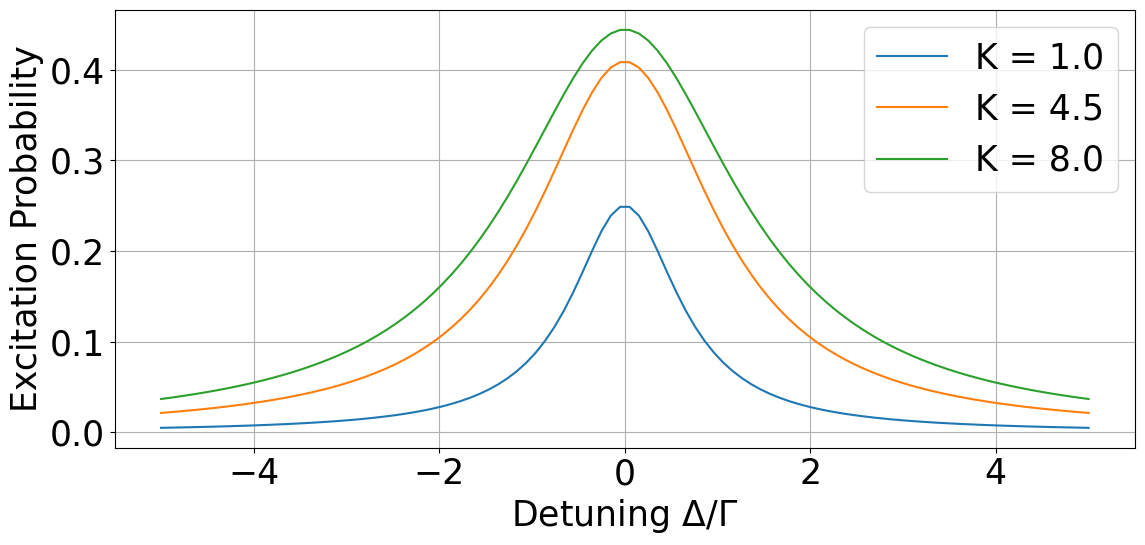

In [38]:
# Calculate the excitation probability for a specific value of K1 (e.g., 5) and plot it
K_range = np.linspace(1, 8, 3)
ratio_ΔΓ_range = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 6))

for K_value in K_range:

    excitation_probability_curve = K_value / (2 * (4 * (ratio_ΔΓ_range**2) + K_value + 1))
    plt.plot(ratio_ΔΓ_range, excitation_probability_curve, label=f'K = {K_value}')
# Plot the second 2D plot


plt.xlabel(r"Detuning $\Delta / \Gamma$")
plt.ylabel('Excitation Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Detuning.png', dpi=300)
plt.show()

Look at complete time evolution and not only the steady state solutions

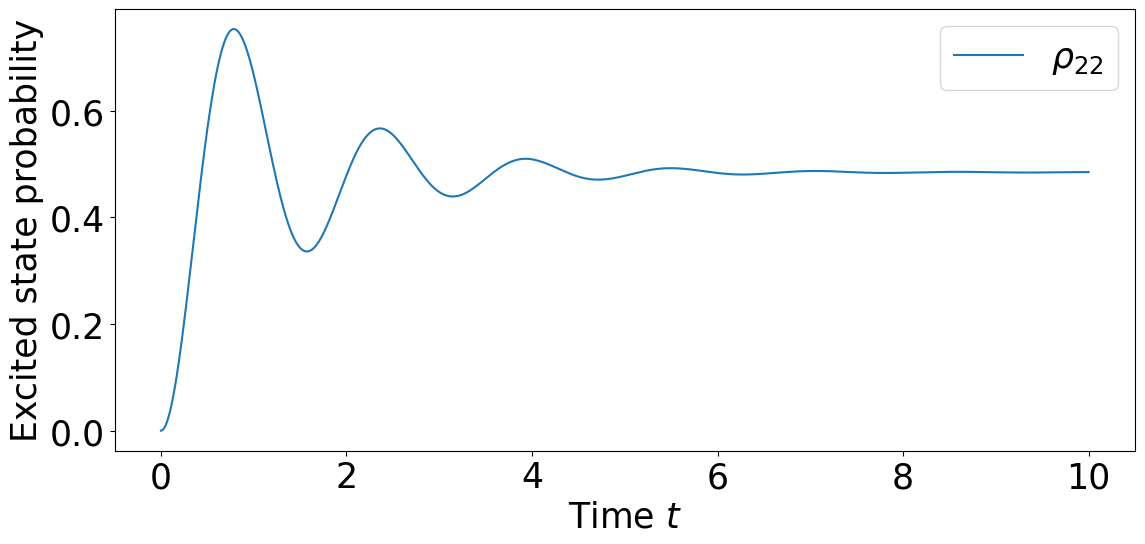

In [48]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Function that returns the derivatives of the variables
def system(t, y, Gamma, Omega):
    rho_11, rho_12, rho_21, rho_22 = y

    dydt = [
        Gamma * rho_22 - 0.5j * (0.5 * Omega * rho_12 - 0.5 * Omega * rho_21),
        -0.5 * Gamma * rho_12 - 0.5j * (0.5 * Omega * rho_11 - 0.5 * Omega * rho_22),
        -0.5 * Gamma * rho_21 - 0.5j * (0.5 * Omega * rho_22 - 0.5 * Omega * rho_11),
        -0.5j * (0.5 * Omega * rho_21 - 0.5 * Omega * rho_12) - Gamma * rho_22
    ]

    return dydt

# Set the parameters
Gamma = 1.0
Omega = 8.0

# Set the initial conditions
initial_conditions = [1.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j]

# Set the time span
t_span = (0, 10)

# Solve the system of differential equations
solution = solve_ivp(
    fun=lambda t, y: system(t, y, Gamma, Omega),
    t_span=t_span,
    y0=initial_conditions,
    method='RK45',
    dense_output=True
)

# Plot the results
t = np.linspace(t_span[0], t_span[1], 1000)
y = solution.sol(t)

plt.figure(figsize=(12, 6))
#plt.plot(t, y.T.real)  # Plot only the real part
# plt.plot(t, y[0].real, label='Re(rho_11)')
plt.plot(t, y[3].real, label=r'$\rho_{22}$')

plt.xlabel('Time $ t \Gamma$')
plt.ylabel('Excited state probability')
plt.legend()
plt.tight_layout()
plt.savefig('Population_evolution.png', dpi=300)
plt.show()



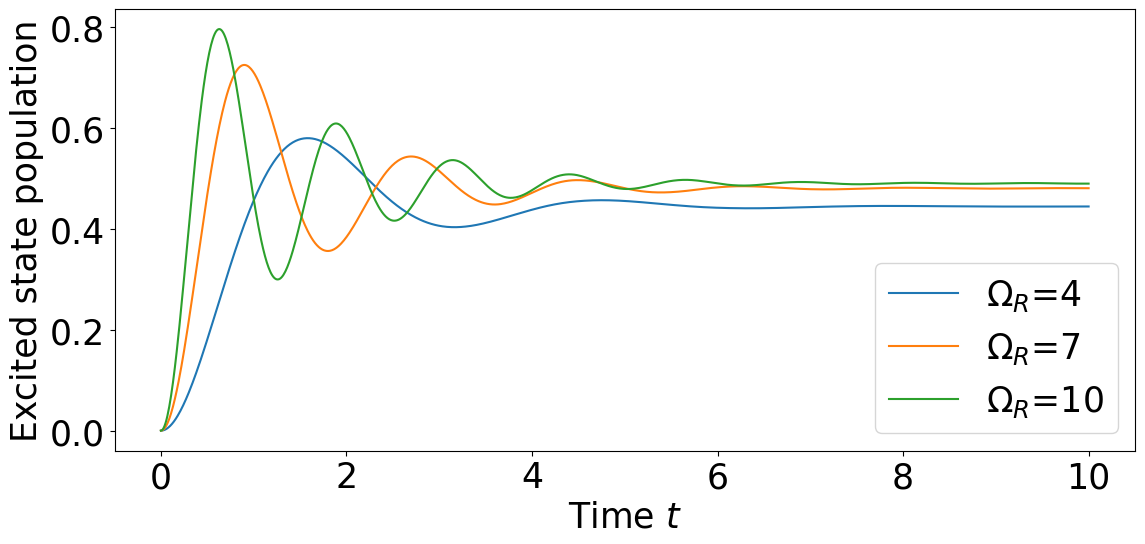

In [40]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Function that returns the derivatives of the variables
def system(t, y, Gamma, Omega):
    rho_11, rho_12, rho_21, rho_22 = y

    dydt = [
        Gamma * rho_22 - 0.5j * (0.5 * Omega * rho_12 - 0.5 * Omega * rho_21),
        -0.5 * Gamma * rho_12 - 0.5j * (0.5 * Omega * rho_11 - 0.5 * Omega * rho_22),
        -0.5 * Gamma * rho_21 - 0.5j * (0.5 * Omega * rho_22 - 0.5 * Omega * rho_11),
        -0.5j * (0.5 * Omega * rho_21 - 0.5 * Omega * rho_12) - Gamma * rho_22
    ]

    return dydt

# Set the parameters
Gamma = 1.0
omega_values = np.linspace(4, 10, 3)  # Specify the range of Omega values

# Set the initial conditions
initial_conditions = [1.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j]

# Set the time span
t_span = (0, 10)

# Plot the coherences for different Omega values
plt.figure(figsize=(12, 6))
for Omega in omega_values:
    # Solve the system of differential equations
    solution = solve_ivp(
        fun=lambda t, y: system(t, y, Gamma, Omega),
        t_span=t_span,
        y0=initial_conditions,
        method='RK45',
        dense_output=True
    )

    # Plot the imaginary parts of rho_12 and rho_21
    t = np.linspace(t_span[0], t_span[1], 1000)
    y = solution.sol(t)
    plt.plot(t, y[3].real, label=f'$\Omega_R$={Omega:.0f}')

plt.xlabel('Time $ t \Gamma$')
plt.ylabel('Excited state population')
plt.legend()
plt.tight_layout()
plt.savefig('Population_evolution_omega.png', dpi=300)
plt.show()


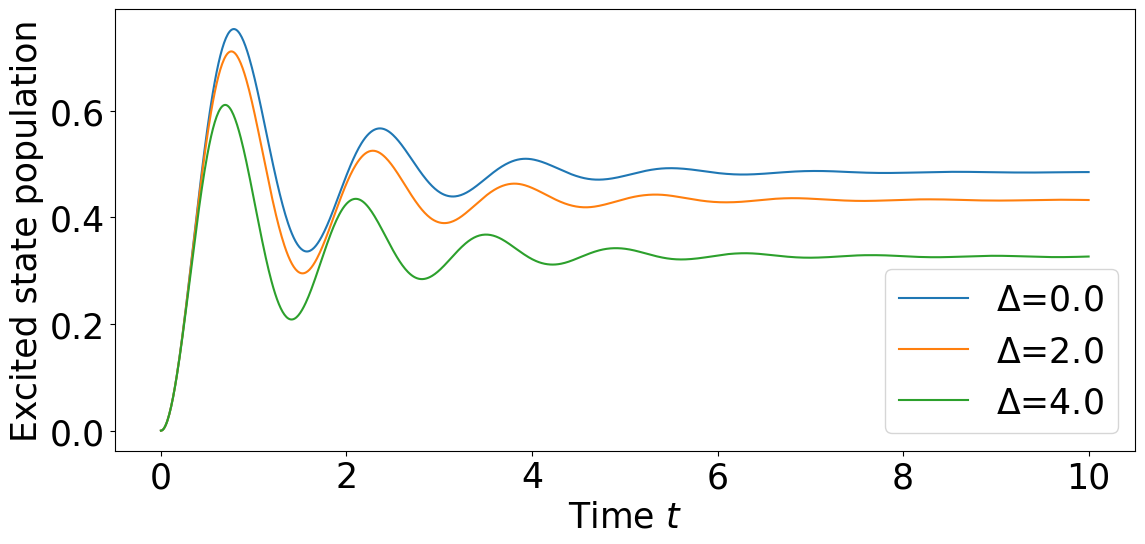

In [41]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Function that returns the derivatives of the variables
def system(t, y, Gamma, Omega, detuning):
    rho_11, rho_12, rho_21, rho_22 = y

    dydt = [
        Gamma * rho_22 - 0.5j * (0.5 * Omega * rho_12 - 0.5 * Omega * rho_21),
        -0.5 * Gamma * rho_12 - 0.5j * (0.5 * Omega * rho_11 + detuning * rho_12 - 0.5 * Omega * rho_22),
        -0.5 * Gamma * rho_21 - 0.5j * (-0.5 * Omega * rho_11 - detuning * rho_21 + 0.5 * Omega * rho_22),
        -0.5j * (0.5 * Omega * rho_21 - 0.5 * Omega * rho_12) - Gamma * rho_22
    ]

    return dydt

# Set the parameters
Gamma = 1.0
Omega = 8.0
detuning_values = np.linspace(0, 4, 3)  # Specify the range of detuning values

# Set the initial conditions
initial_conditions = [1.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j]

# Set the time span
t_span = (0, 10)

# Plot the coherences for different detuning values
plt.figure(figsize=(12, 6))
for detuning in detuning_values:
    # Solve the system of differential equations
    solution = solve_ivp(
        fun=lambda t, y: system(t, y, Gamma, Omega, detuning),
        t_span=t_span,
        y0=initial_conditions,
        method='RK45',
        dense_output=True
    )

    # Plot the imaginary parts of rho_12 and rho_21
    t = np.linspace(t_span[0], t_span[1], 1000)
    y = solution.sol(t)
    plt.plot(t, y[3].real, label=f'$\Delta$={detuning}')

plt.xlabel('Time $ t \Gamma$')
plt.ylabel('Excited state population')
plt.legend()
plt.tight_layout()
plt.savefig('Population_evolution_detuning.png', dpi=300)
plt.show()


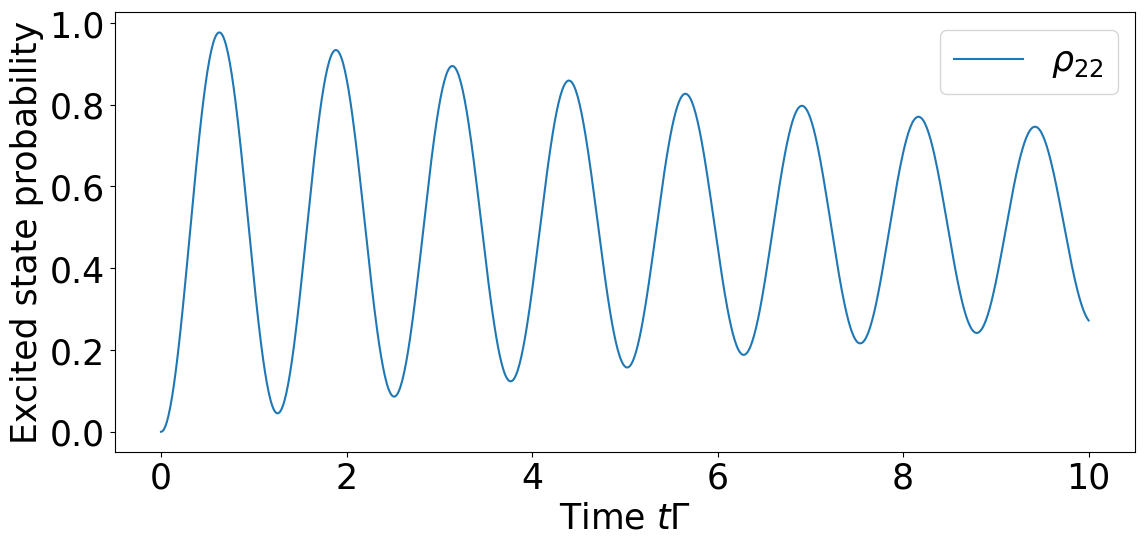

In [57]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Function that returns the derivatives of the variables
def system(t, y, Gamma, Omega):
    rho_11, rho_12, rho_21, rho_22 = y

    dydt = [
        Gamma * rho_22 - 0.5j * (0.5 * Omega * rho_12 - 0.5 * Omega * rho_21),
        -0.5 * Gamma * rho_12 - 0.5j * (0.5 * Omega * rho_11 - 0.5 * Omega * rho_22),
        -0.5 * Gamma * rho_21 - 0.5j * (0.5 * Omega * rho_22 - 0.5 * Omega * rho_11),
        -0.5j * (0.5 * Omega * rho_21 - 0.5 * Omega * rho_12) - Gamma * rho_22
    ]

    return dydt

# Set the parameters
Gamma = 0.1
Omega = 10.0

# Set the initial conditions
initial_conditions = [1.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j]

# Set the time span
t_span = (0, 10)

# Solve the system of differential equations
solution = solve_ivp(
    fun=lambda t, y: system(t, y, Gamma, Omega),
    t_span=t_span,
    y0=initial_conditions,
    method='RK45',
    dense_output=True
)

# Plot the results
t = np.linspace(t_span[0], t_span[1], 1000)
y = solution.sol(t)

plt.figure(figsize=(12, 6))
#plt.plot(t, y.T.real)  # Plot only the real part
# plt.plot(t, y[0].real, label='Re(rho_11)')
plt.plot(t, y[3].real, label=r'$\rho_{22}$')

plt.xlabel('Time $ t \Gamma$')
plt.ylabel('Excited state probability')
plt.legend()
plt.tight_layout()
# plt.savefig('Population_evolution.png', dpi=300)
plt.show()



In [ ]:
# import numpy as np
# from scipy.integrate import solve_ivp
# import matplotlib.pyplot as plt

# # Function that returns the derivatives of the variables
# def system(t, y, Gamma, Omega):
#     rho_11, rho_12, rho_21, rho_22 = y

#     # Check for a random event triggering a reset
#     if np.random.rand() < reset_probability:
#         return [1.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j]

#     else:
#         dydt = [
#             Gamma * rho_22 - 0.5j * (0.5 * Omega * rho_12 - 0.5 * Omega * rho_21),
#             -0.5 * Gamma * rho_12 - 0.5j * (0.5 * Omega * rho_11 - 0.5 * Omega * rho_22),
#             -0.5 * Gamma * rho_21 - 0.5j * (0.5 * Omega * rho_22 - 0.5 * Omega * rho_11),
#             -0.5j * (0.5 * Omega * rho_21 - 0.5 * Omega * rho_12) - Gamma * rho_22
#         ]

#     return dydt

# # Set the parameters
# Gamma = 1.0
# Omega = 8.0
# reset_probability = 0.5  # Adjust the reset probability as needed

# # Set the initial conditions
# initial_conditions = [1.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j]

# # Set the time span
# t_span = (0, 10)

# # Solve the system of differential equations
# solution = solve_ivp(
#     fun=lambda t, y: system(t, y, Gamma, Omega),
#     t_span=t_span,
#     y0=initial_conditions,
#     method='RK45',
#     dense_output=True
# )

# # Plot the results
# t = np.linspace(t_span[0], t_span[1], 1000)
# y = solution.sol(t)

# plt.figure(figsize=(12, 6))
# plt.plot(t, y[0].real, label='Re(rho_11)')
# plt.plot(t, y[3].real, label='Re(rho_22)')

# plt.xlabel('Time $ t \Gamma$')
# plt.ylabel('Population')
# plt.legend([r'$\rho_{11}$', r'$\rho_{12}$', r'$\rho_{21}$', r'$\rho_{22}$'])
# plt.tight_layout()
# plt.savefig('Stochastic_Population_evolution.png', dpi=300)
# plt.show()
